# 2016-12-02: Dimensionality reduction

## Breast vs ovary cancer data

For this lab, we will work with gene expression data measured on breast and ovary tumors. The data originally comes from http://gemler.fzv.uni-mb.si/index.php but has been downsized so that it is easier to work with in our labs.

The data is similar to the Endometrium vs. Uterus cancer we have been working with for several weeks. 

The data we will work with contains the expression of 3,000 genes, measured for 344 breast tumors and 198 ovary tumors.

### Imports

In [1]:
import numpy as np # numeric python

# scikit-learn (machine learning)
from sklearn import preprocessing 
from sklearn import decomposition 

In [2]:
# Graphics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Loading the data
It is stored in a CSV file, `small_Breast_Ovary.csv`. It has the same format as the `small_Endometrium_Uterus.csv` file. Load the data, creating a 2-dimensional numpy array X containing the gene expression data, and an 1-dimensional numpy array y containing the labels.

In [3]:
# Load the data
X = np.loadtxt('data/small_Breast_Ovary.csv',  delimiter=',', skiprows=1, usecols=range(1, 3001))
y = np.loadtxt('data/small_Breast_Ovary.csv', delimiter=',', skiprows=1, usecols=[3001], dtype='string')

**Question** What are the dimensions of X? How many samples come from ovary tumors? How many come from breast tumors?

In [4]:
print("Dimension of X : {}".format(X.shape))
print("number of Ovary tumors : {}".format(sum(np.where(y=='Ovary',1,0))))
print("number of Breast tumors : {}".format(sum(np.where(y=='Breast',1,0))))

y = np.where(y=='Breast', 0, 1)# Breast now equal to 0 and Ovary to 1

Dimension of X : (542, 3000)
number of Ovary tumors : 198
number of Breast tumors : 344


## Principal Component Analysis

PCA documentation: http://scikit-learn.org/0.17/modules/decomposition.html#pca and
http://scikit-learn.org/0.17/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

### Data normalization

Remember that PCA works on normalized data (mean 0, standard deviation 1). Normalize the data.

In [5]:
X_norm=preprocessing.scale(X)
print("mean : {}".format(np.mean(X_norm)))
print("std : {}".format(np.std(X_norm)))

mean : 2.10453494183e-17
std : 1.0


### 30 first principal components

In [6]:
pca = decomposition.PCA(n_components=30)
pca.fit(X_norm)
print(X_norm)

[[ 0.08352948 -0.21397812 -0.46468955 ..., -0.25945544 -0.64886073
  -0.03723674]
 [ 0.89613777 -0.5878718  -0.44264094 ..., -1.23653314 -0.69581566
  -0.53377918]
 [-0.16838975 -0.45090085 -0.47323902 ..., -0.73312571  0.32730748
  -0.26256486]
 ..., 
 [-0.77669119  4.98104626 -0.38594451 ...,  0.47016672 -0.37701642
  -0.74051835]
 [ 0.65807587  1.15573139 -0.52723562 ..., -1.2535258  -0.65133204
  -0.28173993]
 [-0.03443552  1.07799112  0.29081287 ...,  0.736739   -0.56483612
  -0.38590499]]


**Question:** Plot the fraction of variance explained by each component. Use `pca.explained_variance_ratio_`

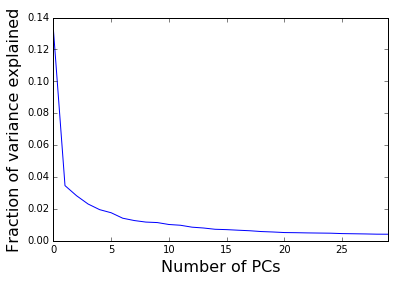

In [7]:
# TODO
plt.plot(range(30),pca.explained_variance_ratio_)

plt.xlim([0, 29])
plt.xlabel("Number of PCs", fontsize=16)
plt.ylabel("Fraction of variance explained", fontsize=16)

**Question:** Use `pca.transform` to project the data onto its principal components. How is `pca.explained_variance_ratio_` computed? Check this is the case by computing it yourself.

[[ -0.8655996    5.83598935  -3.88245632 ...,   0.32996328  -2.61460339
    1.42632382]
 [-10.18443198  -1.26118084  -4.07831589 ...,  -1.46691225  -1.71878979
    0.28477005]
 [-27.95043154  11.44292256 -14.2433123  ...,  -3.96822284   4.50205078
    4.30328344]
 ..., 
 [ -1.84344359 -14.66717274  12.84558623 ...,  -1.06275256   1.97719682
   -1.73670311]
 [-23.68031879 -10.36061155   6.60234681 ...,  -2.16798059  -4.5302545
   -5.21576925]
 [ -9.50282499 -11.86902579   9.87740389 ...,  -2.24893917  -1.29780185
   -3.21546387]]
X_proj a comme dimensions : (542, 30)


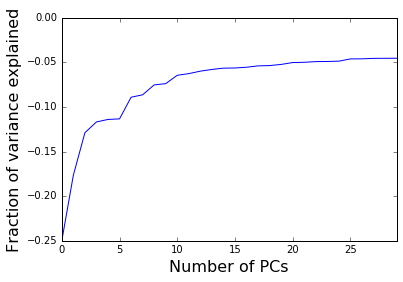

In [8]:
X_proj = pca.transform(X_norm)
print(X_proj)
print("X_proj a comme dimensions : {}".format(np.shape(X_proj)))

X_cov=np.cov(X_norm)
eigen_val=[X_norm[i][i] for i in range(len(X_norm))]
sum_var=sum(eigen_val)
eigen_val.sort(reverse = True)

var_perc_list=eigen_val[:30]/sum_var


plt.plot(range(30),var_perc_list)

plt.xlim([0, 29])
plt.xlabel("Number of PCs", fontsize=16)
plt.ylabel("Fraction of variance explained", fontsize=16)

In [9]:
#Projecting X onto its principal components
X_proj = pca.transform(X_norm)
print(X_proj)
n,p = np.shape(X_proj)
print("X is now an array with {} samples and {} columns.".format(n,p))

#Computing Sigma
Sigma = corrcoef(X_norm, rowvar=0)

#Computing Singular Value Decomposition of Sigma
u,s,v = np.linalg.svd(Sigma)

#Getting eingenvalues of Sigmea
eigenvalues = list(s)
total_variance = np.array(eigenvalues).sum()

#Keeping only the first 30 largest eigenvalues 
eigenvalues.sort(reverse = True)
eigenvalues = eigenvalues[:30]

#Computing explained variance for each PC
explained_variance = eigenvalues/ total_variance

print("Finaly, the explained variance for each PC is : ")
print(explained_variance)
print("We can check that this array is identical as the one obtained with scikit : ")
print(pca.explained_variance_ratio_)

[[ -0.8655996    5.83598935  -3.88245632 ...,   0.32996328  -2.61460339
    1.42632382]
 [-10.18443198  -1.26118084  -4.07831589 ...,  -1.46691225  -1.71878979
    0.28477005]
 [-27.95043154  11.44292256 -14.2433123  ...,  -3.96822284   4.50205078
    4.30328344]
 ..., 
 [ -1.84344359 -14.66717274  12.84558623 ...,  -1.06275256   1.97719682
   -1.73670311]
 [-23.68031879 -10.36061155   6.60234681 ...,  -2.16798059  -4.5302545
   -5.21576925]
 [ -9.50282499 -11.86902579   9.87740389 ...,  -2.24893917  -1.29780185
   -3.21546387]]
X is now an array with 542 samples and 30 columns.
Finaly, the explained variance for each PC is : 
[ 0.13205898  0.03462144  0.02827812  0.023073    0.01954028  0.01758839
  0.01416885  0.01270834  0.01174585  0.01143474  0.01022598  0.009751
  0.00855024  0.00802414  0.00722859  0.00700922  0.00663953  0.0063098
  0.00580649  0.0055306   0.00517346  0.00508748  0.00495225  0.00485792
  0.00477151  0.00452372  0.0044175   0.00430679  0.00415507  0.00412264]
We

**Question:** Plot the data in the space of the two first components; color breast samples in blue and ovary samples in orange. What do you observe? Can you separate the two classes visually?

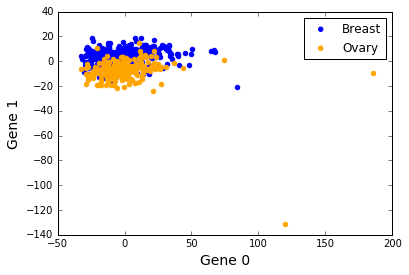

In [10]:
idx_1 = 0 # first axis (or gene)
idx_2 = 1 # second axis (or gene)
plt.scatter(X_proj[y==0, idx_1], X_proj[y==0, idx_2], # y==0 gives the indices of the columns for which y is equal to 0
            color='blue', label='Breast')
plt.scatter(X_proj[y==1, idx_1], X_proj[y==1, idx_2], color='orange', label='Ovary')
plt.legend(scatterpoints=1)
plt.xlabel('Gene %d' % idx_1, fontsize=14)
plt.ylabel('Gene %d' % idx_2, fontsize=14)

**Bonus question:** Rather than visually, actually try to separate the two classes by a logistic regression line (using only the two first PCs). Plot the decision boundary. You can draw inspiration from http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py for the plot.

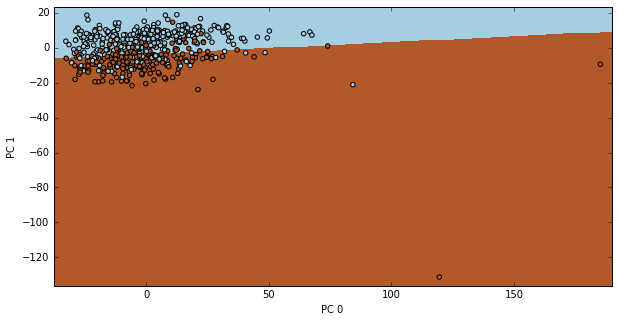

In [11]:
from sklearn import linear_model

plt.figure(1, figsize=(10, 5))
h = 0.5  # step size in the mesh

X_Proj_=X_proj[:600,:2]

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X_Proj_, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_Proj_[:, 0].min() - 5, X_Proj_[:, 0].max() + 5
y_min, y_max = X_Proj_[:, 1].min() - 5, X_Proj_[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_Proj_[:, 0], X_Proj_[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('PC 0')
plt.ylabel('PC 1')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

### Outliers
**Question:** How many outliers do you observe in your data? Identify which entries of the X matrix they correspond to, and remove them from your data.

We may observe 2 to 7 to 18 outlier, they are the one who's distance is the longest from the pack

In [12]:
print("moyenne PC 0 : {}".format(np.mean(X_proj[:,0])))
print("moyenne PC 1 : {}".format(np.mean(X_proj[:,1])))
# Mean should be equal to 0.
distanceToOrigin=np.sort(np.array([np.sqrt((X_proj[:,0]**2)+(X_proj[:,1]**2))]))
distanceToOrigin[0][-7]

moyenne PC 0 : -1.0487715657e-16
moyenne PC 1 : -1.0487715657e-16


64.722214005351347

In [20]:
outliers = []
for i in range(len(X_proj)):
    if X_proj[i,0] > 64.0:
        outliers.append(i)

#Delete outliers from X
X_clean = np.delete(X[:,:], outliers, axis = 0)
y_clean = np.delete(y[:], outliers)
print("Thus, we have now {} samples".format(len(X_clean)))

Thus, we have now 535 samples


**Question:** Repeat the PCA procedure on the data without outliers. Can you now visually separate the two tissues?

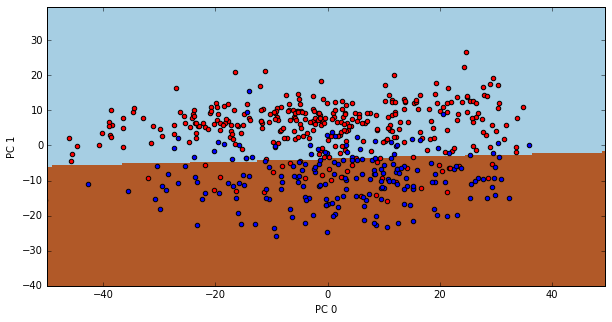

In [25]:
X_norm_clean=preprocessing.scale(X_clean)
pca.fit(X_norm_clean)
X_proj_clean = pca.transform(X_norm_clean)

plt.figure(1, figsize=(10, 5))
h = 0.5  # step size in the mesh

X_Proj_=X_proj_clean[:,:2]

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X_Proj_, y_clean)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = -50,50
y_min, y_max = -40,40
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
for color_name, tissue, tissue_name in zip(['red', 'blue'], [0, 1], ['breast', 'ovary']):
    plt.scatter(X_Proj_[y_clean == tissue, 0], X_Proj_[y_clean == tissue, 1], 
                c=color_name, label=tissue_name, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('PC 0')
plt.ylabel('PC 1')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

### Classifying dimensionality-reduced data

**Question:** How many PCs do you think are sufficient to represent your data? What do you expect will happen if you use the projection of the gene expressions on these PCs and run a cross-validation of a classification algorithm? Try it out. Is there a risk of overfitting when you do this? 

**Question:** Working on the original features, how do you expect your decision boundary (and AUC) to change, for different algorithms, depending on whether or not the outliers are included in the data? Try it out. 